# National Park Service Species Conservation Analysis

#### *Kim Kirk* <br /> *November 13, 2020* 

# Synopsis

A descriptive and inferential data analysis was performed on the conservation statuses of endangered species across National Parks in the United States. 5,824 rows were imported, cleaned, and analyzed. Analysis of conservation statuses was conducted to investigate if there are any patterns to the types of species that become endangered. Analysis of the hoof and mouth disease program was conducted to identify required sample size to test for program effectiveness. 

### Data Processing

Import necessary libraries and the data set. Explore the data set.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
species = pd.read_csv('species_info.csv', skipinitialspace=True)

In [3]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


Identify number of different species, categories, and conservation statuses in the data set.

In [4]:
species.scientific_name.nunique()

5541

In [5]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [6]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### Exploratory Data Analysis


Identify how many species fall under each conservation status.

In [7]:
species.groupby('conservation_status').scientific_name.count()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
Name: scientific_name, dtype: int64

Conservation statuses are defined as:

* Endangered: seriously at risk of extinction
* In Recovery: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range
* Species of Concern: declining or appear to be in need of conservation
* Threated: vulnerable to endangerment in the near future

Additional definitions can be found on the National Geographic website: [Link](https://www.nationalgeographic.org/encyclopedia/endangered-species/)

Identify and re-code NA values to 'No Intervention' for ease of readability and analysis.

In [8]:
species.fillna('No Intervention', inplace=True)

In [9]:
species.groupby('conservation_status').scientific_name.count()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
Name: scientific_name, dtype: int64

It looks like 'No Intervention' has the most counts for conservation status; this means there is no conservation data provided for the majority of the species in the data set. The next highest count of conservation status is for 'Species of Concern' where the species is declining or appear to be in need of conservation.

Re-coding these data and creating a visualization for these data for ease of readability.

In [10]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')

print(protection_counts.head())

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


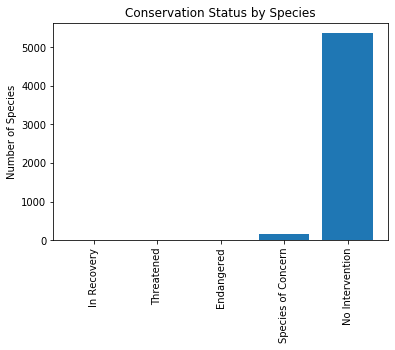

In [11]:
figsize=(10, 4)
ax = plt.subplot()
plt.bar(range(len(protection_counts.scientific_name)), protection_counts.scientific_name)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(protection_counts.conservation_status, rotation='vertical')
ax.set_ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

Identify if there are certain types of species more likely to be endangered. 

Recode these data to more easily see which species are protected based on conservation status.

In [12]:
species['is_protected'] = species.conservation_status.apply(lambda x: True if x != 'No Intervention' else False)
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


Identify how many species by their scientific name is protected or not.

In [13]:
category_counts = species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index()

In [14]:
print(category_counts.head())

    category  is_protected  scientific_name
0  Amphibian         False               72
1  Amphibian          True                7
2       Bird         False              413
3       Bird          True               75
4       Fish         False              115


Rearrange the dataframe for ease of readability.

In [15]:
category_pivot = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

In [16]:
print(category_pivot.head())

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    11
3                        Mammal    146    30
4             Nonvascular Plant    328     5


Rename columns for ease of readability and analysis.

In [17]:
category_pivot.columns = ['category', 'not_protected', 'protected']
print(category_pivot.head())

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5


It looks like the Bird species has the most unprotected species members while the Amphibian species has the least unprotected species members. Additionally, it looks like the Bird species has the most protected species members and the Nonvascular Plant has the least protected species members. 

Calculate percent protected for each species.

In [18]:
category_pivot['percent_protected'] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)

In [19]:
print(category_pivot.head())

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           0.088608
1               Bird            413         75           0.153689
2               Fish            115         11           0.087302
3             Mammal            146         30           0.170455
4  Nonvascular Plant            328          5           0.015015


It looks like species `Mammal` are more likely to be endangered than species in `Bird`. Running a chi-square significance test to see if this statement is correct.

Importing necessary libraries to perform the test.

In [20]:
from scipy.stats import chi2_contingency

Create a contingency table for the chi-square test parameter.

In [21]:
contingency = [[30,146], [75, 413]]

In [22]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.6875948096661336


It looks like this difference is not significant. Is there significance between `Mammal` and `Bird`?

In [23]:
contingency2 = [[7, 72], [30, 146]]
chi2, pval, dof, expected = chi2_contingency(contingency2)
print(pval)

0.12757669693198975


It looks like there is not a significant difference between `Amphibian` and `Mammal` either.

Importing data of sightings of different species at several national parks for the past 7 days. These will be used as data for to analyze the special intervention program for foot and mouth disease. 

In [24]:
observations = pd.read_csv('observations.csv')

Drilling down into the data specifically on sheep, as sheep have hooves and are a good species to analyze for the foot and mouth disease issue. Identify in these data where 'Sheep' occurs in the `common_names` variable to separate the.

In [25]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

We want the species that is `Mammal` and not, for example, a plant. Identify where the row has 'Sheep' and is a `Mammal`.

In [26]:
species[species.is_sheep == True]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [27]:
sheep_species = species[(species.is_sheep == True) & (species.category == 'Mammal')]

Merge dataframes to identify how many Sheep observations in the data set. 

In [28]:
sheep_observations = pd.merge(sheep_species, observations)
print(sheep_observations)


   category          scientific_name  \
0    Mammal               Ovis aries   
1    Mammal               Ovis aries   
2    Mammal               Ovis aries   
3    Mammal               Ovis aries   
4    Mammal          Ovis canadensis   
5    Mammal          Ovis canadensis   
6    Mammal          Ovis canadensis   
7    Mammal          Ovis canadensis   
8    Mammal  Ovis canadensis sierrae   
9    Mammal  Ovis canadensis sierrae   
10   Mammal  Ovis canadensis sierrae   
11   Mammal  Ovis canadensis sierrae   

                                         common_names conservation_status  \
0   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
2   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                        Bighorn Sheep, Bighorn Sheep  Species of Concern   
5                

Identify total number of observed shees across three species were made at each national park over the past 7 days. 

In [29]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


Create visualization for ease of readability of these data.

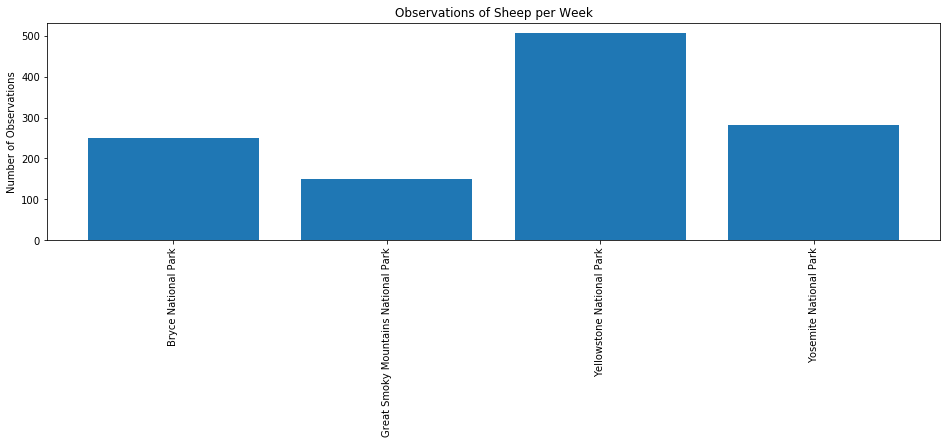

In [30]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park.observations)),obs_by_park.observations)
ax.set_xticks(range(len(obs_by_park.park_name)))
ax.set_xticklabels(obs_by_park.park_name, rotation='vertical')
plt.ylabel("Number of Observations")
plt.title('Observations of Sheep per Week')
plt.show()

Park rangers at Yellowstone National Park are running a program to reduce the rate of foot and mouth disease at that park. 15% of sheep at Bryce National Park have foot and mouth disease. They want to test whether or not this program is works. They want to be able to detect reductions of at least 5 percentage points. For example, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence. They will need to know the required sample size when testing the program.

Use <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">sample size calculator</a> to calculate the number of sheep that they would need to observe from each park with a significance level of 90%.

In [31]:
baseline_conversion_rate = 0.15
stat_significance = 0.90
mde = 100 * (0.05 / 0.15)
sample_size_required = 870

print('Minimal Detectable Effect is: ')
print(mde)
print('\n')
print('Sample size required for Bryce National Park sheep is:')
print(sample_size_required)

Minimal Detectable Effect is: 
33.333333333333336


Sample size required for Bryce National Park sheep is:
870


Identify number of weeks would be needed to observe sheep at Yellowstone National Park and Bryce National Park.

In [32]:
print('Number of weeks needed to observe sheep at Bryce National Park:')
print(sample_size_required / obs_by_park[obs_by_park.park_name == 'Bryce National Park'].observations)

print('Number of weeks needed to observe sheep at Yellowstone National Park:')
sample_size_required / obs_by_park[obs_by_park.park_name == 'Yellowstone National Park'].observations


Number of weeks needed to observe sheep at Bryce National Park:
0    3.48
Name: observations, dtype: float64
Number of weeks needed to observe sheep at Yellowstone National Park:


2    1.715976
Name: observations, dtype: float64

### Conclusion

Based on the analysis, there is no significant difference in terms of increased likelihood of being endangered between Mammals and Birds, or Mammals and Amphibians. Additional significance testing should be conducted between other species to identify if there is a significant difference in terms of increased likelihood of being endangered; this would identify where to focus conservation resources and efforts. 